In [2]:
# %%
import sys
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime, timedelta

# Import your existing pipeline components
from stock_predictor.data_pipeline import StockDataPipeline
from stock_predictor.preprocessing import DataPreprocessor
from stock_predictor.models import StockPredictor

print("üáÆüá≥ BSE/NSE Real Working Stocks Analysis - August 2025")
print("=" * 70)

# Initialize data pipeline
config_path = "../config/config.yaml"
pipeline = StockDataPipeline(config_path)
preprocessor = DataPreprocessor(config_path)

# VERIFIED working symbols
verified_symbols = [
    "RELIANCE.NS",      # Reliance Industries
    "TCS.NS",           # Tata Consultancy Services
    "INFY.NS",          # Infosys
    "HDFCBANK.NS",      # HDFC Bank
    "ICICIBANK.NS",     # ICICI Bank
    "HINDUNILVR.NS",    # Hindustan Unilever
    "ITC.NS",           # ITC Limited
    "KOTAKBANK.NS",     # Kotak Mahindra Bank
    "BHARTIARTL.NS",    # Bharti Airtel
    "ASIANPAINT.NS"     # Asian Paints
]

print("üìà Using VERIFIED working Indian stock symbols:")
for i, symbol in enumerate(verified_symbols, 1):
    company_name = {
        "RELIANCE.NS": "Reliance Industries",
        "TCS.NS": "Tata Consultancy Services", 
        "INFY.NS": "Infosys",
        "HDFCBANK.NS": "HDFC Bank",
        "ICICIBANK.NS": "ICICI Bank",
        "HINDUNILVR.NS": "Hindustan Unilever",
        "ITC.NS": "ITC Limited",
        "KOTAKBANK.NS": "Kotak Mahindra Bank",
        "BHARTIARTL.NS": "Bharti Airtel",
        "ASIANPAINT.NS": "Asian Paints"
    }
    print(f"   {i:2d}. {symbol:<16} ({company_name[symbol]})")

print(f"\nüîÑ Fetching data for {len(verified_symbols)} verified stocks...")
print("   Using period='1y' for comprehensive analysis")

# Fetch real-time data with better error handling
fetched_data = {}
fetch_period = "1y"
successful_fetches = 0

for symbol in verified_symbols:
    try:
        print(f"üìä Fetching {symbol}...", end=" ")
        
        # Use your existing pipeline
        raw_data = pipeline.fetch_yahoo_data(
            symbol=symbol,
            period=fetch_period
        )
        
        if raw_data is not None and len(raw_data) > 0:
            fetched_data[symbol] = raw_data
            successful_fetches += 1
            
            latest_price = raw_data['Close'].iloc[-1]
            
            # Calculate weekly change (last 5 trading days)
            if len(raw_data) >= 5:
                weekly_change = ((raw_data['Close'].iloc[-1] / raw_data['Close'].iloc[-5]) - 1) * 100
                weekly_str = f"({weekly_change:+.2f}%)"
                trend_emoji = "üöÄ" if weekly_change > 5 else "üìà" if weekly_change > 0 else "üìâ"
            else:
                weekly_str = ""
                trend_emoji = "üìä"
            
            print(f"‚úÖ ‚Çπ{latest_price:.2f} {weekly_str} {trend_emoji}")
        else:
            print(f"‚ö†Ô∏è No data")
            
    except Exception as e:
        print(f"‚ùå {str(e)[:50]}...")

print(f"\nüéØ Results Summary:")
print(f"   ‚úÖ Successfully fetched: {successful_fetches}/{len(verified_symbols)} stocks")

if fetched_data:
    # Show data quality metrics - SAFE VERSION (no problematic date handling)
    total_records = sum(len(df) for df in fetched_data.values())
    sample_df = list(fetched_data.values())[0]
    
    print(f"\nüìä Data Quality:")
    print(f"   ‚Ä¢ Total data points: {total_records:,}")
    print(f"   ‚Ä¢ Successful stocks: {len(fetched_data)}")
    print(f"   ‚Ä¢ Records per stock: ~{total_records // len(fetched_data)}")
    print(f"   ‚Ä¢ Sample data shape: {sample_df.shape}")
    print(f"   ‚Ä¢ Columns: {list(sample_df.columns)}")
    
    # Safe way to show data range without assuming date format
    print(f"   ‚Ä¢ Index type: {type(sample_df.index).__name__}")
    if len(sample_df) > 0:
        print(f"   ‚Ä¢ Data rows: {len(sample_df)} records")
    
    # Quick performance analysis
    print(f"\nüèÜ Recent Performance (5-day change):")
    performers = []
    
    for symbol, df in fetched_data.items():
        if len(df) >= 5:
            recent_change = ((df['Close'].iloc[-1] / df['Close'].iloc[-5]) - 1) * 100
            current_price = df['Close'].iloc[-1]
            performers.append((symbol, recent_change, current_price))
    
    if performers:
        # Sort by performance
        performers.sort(key=lambda x: x[1], reverse=True)
        
        for i, (symbol, change, price) in enumerate(performers[:5], 1):
            trend = "üöÄ" if change > 3 else "üìà" if change > 0 else "üìâ"
            print(f"   {i}. {symbol}: {change:+.2f}% (‚Çπ{price:.2f}) {trend}")
    
    # Select primary stock for LSTM training
    primary_symbol = list(fetched_data.keys())[0]
    primary_data = fetched_data[primary_symbol]
    
    print(f"\nüéØ Primary stock selected for LSTM training: {primary_symbol}")
    print(f"   ‚Ä¢ Records: {len(primary_data)}")
    print(f"   ‚Ä¢ Current price: ‚Çπ{primary_data['Close'].iloc[-1]:.2f}")
    print(f"   ‚Ä¢ Price range: ‚Çπ{primary_data['Close'].min():.2f} - ‚Çπ{primary_data['Close'].max():.2f}")
    print(f"   ‚Ä¢ Available features: {list(primary_data.columns)}")
    
    print(f"\n‚úÖ Data successfully loaded! Ready for preprocessing and LSTM training.")
    
else:
    print("\n‚ùå No stock data fetched successfully.")
    print("üí° Troubleshooting suggestions:")
    print("   1. Update yfinance: !pip install --upgrade yfinance")
    print("   2. Check internet connection")
    print("   3. Try shorter period: '6mo' or '3mo'")
    print("   4. Verify symbols are active on Yahoo Finance")

print("\n" + "="*70)
print("üöÄ Ready for Cell 2: Data Preprocessing with Technical Indicators")

2025-08-16 06:50:06.445277: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-16 06:50:09,953 - stock_predictor.data_pipeline - INFO - StockDataPipeline initialized successfully
2025-08-16 06:50:09,954 - stock_predictor.data_pipeline - INFO - Alpha Vantage client initialized
2025-08-16 06:50:09,955 - stock_predictor.data_pipeline - INFO - API clients setup completed
2025-08-16 06:50:09,956 - stock_predictor.data_pipeline - INFO - Data directories created: ../data/raw, ../data/processed
2025-08-16 06:50:09,959 - stock_predictor.preprocessing - INFO - DataPreprocessor initialized successfully
2025-08-16 06:50:09,960 - stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for RELIANCE.NS with period 1y
2025-08-16 06:50:09,961 - stock_predictor.

üáÆüá≥ BSE/NSE Real Working Stocks Analysis - August 2025
üìà Using VERIFIED working Indian stock symbols:
    1. RELIANCE.NS      (Reliance Industries)
    2. TCS.NS           (Tata Consultancy Services)
    3. INFY.NS          (Infosys)
    4. HDFCBANK.NS      (HDFC Bank)
    5. ICICIBANK.NS     (ICICI Bank)
    6. HINDUNILVR.NS    (Hindustan Unilever)
    7. ITC.NS           (ITC Limited)
    8. KOTAKBANK.NS     (Kotak Mahindra Bank)
    9. BHARTIARTL.NS    (Bharti Airtel)
   10. ASIANPAINT.NS    (Asian Paints)

üîÑ Fetching data for 10 verified stocks...
   Using period='1y' for comprehensive analysis
üìä Fetching RELIANCE.NS... 

2025-08-16 06:50:10,674 - stock_predictor.data_pipeline - INFO - Data validation passed
2025-08-16 06:50:10,679 - stock_predictor.data_pipeline - INFO - Converted timestamps to IST for RELIANCE.NS
2025-08-16 06:50:10,679 - stock_predictor.data_pipeline - INFO - Data cleaned successfully for RELIANCE.NS
2025-08-16 06:50:10,680 - stock_predictor.data_pipeline - INFO - Successfully fetched 251 records for RELIANCE.NS
2025-08-16 06:50:10,681 - stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for TCS.NS with period 1y
2025-08-16 06:50:10,682 - stock_predictor.data_pipeline - INFO - Attempt 1/3 for TCS.NS
2025-08-16 06:50:10,834 - stock_predictor.data_pipeline - INFO - Data validation passed
2025-08-16 06:50:10,838 - stock_predictor.data_pipeline - INFO - Converted timestamps to IST for TCS.NS
2025-08-16 06:50:10,839 - stock_predictor.data_pipeline - INFO - Data cleaned successfully for TCS.NS
2025-08-16 06:50:10,840 - stock_predictor.data_pipeline - INFO - Successfully fetched 2

‚úÖ ‚Çπ1373.80 (+0.84%) üìà
üìä Fetching TCS.NS... ‚úÖ ‚Çπ3022.30 (-0.46%) üìâ
üìä Fetching INFY.NS... 

2025-08-16 06:50:10,997 - stock_predictor.data_pipeline - INFO - Data validation passed
2025-08-16 06:50:11,000 - stock_predictor.data_pipeline - INFO - Converted timestamps to IST for INFY.NS
2025-08-16 06:50:11,001 - stock_predictor.data_pipeline - INFO - Data cleaned successfully for INFY.NS
2025-08-16 06:50:11,002 - stock_predictor.data_pipeline - INFO - Successfully fetched 251 records for INFY.NS
2025-08-16 06:50:11,003 - stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for HDFCBANK.NS with period 1y
2025-08-16 06:50:11,004 - stock_predictor.data_pipeline - INFO - Attempt 1/3 for HDFCBANK.NS
2025-08-16 06:50:11,156 - stock_predictor.data_pipeline - INFO - Data validation passed
2025-08-16 06:50:11,161 - stock_predictor.data_pipeline - INFO - Converted timestamps to IST for HDFCBANK.NS
2025-08-16 06:50:11,162 - stock_predictor.data_pipeline - INFO - Data cleaned successfully for HDFCBANK.NS
2025-08-16 06:50:11,162 - stock_predictor.data_pipeline - INFO - Successfully f

‚úÖ ‚Çπ1447.70 (+1.73%) üìà
üìä Fetching HDFCBANK.NS... ‚úÖ ‚Çπ1991.10 (+0.87%) üìà
üìä Fetching ICICIBANK.NS... 

2025-08-16 06:50:11,318 - stock_predictor.data_pipeline - INFO - Data validation passed
2025-08-16 06:50:11,323 - stock_predictor.data_pipeline - INFO - Converted timestamps to IST for ICICIBANK.NS
2025-08-16 06:50:11,324 - stock_predictor.data_pipeline - INFO - Data cleaned successfully for ICICIBANK.NS
2025-08-16 06:50:11,324 - stock_predictor.data_pipeline - INFO - Successfully fetched 251 records for ICICIBANK.NS
2025-08-16 06:50:11,325 - stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for HINDUNILVR.NS with period 1y
2025-08-16 06:50:11,326 - stock_predictor.data_pipeline - INFO - Attempt 1/3 for HINDUNILVR.NS
2025-08-16 06:50:11,476 - stock_predictor.data_pipeline - INFO - Data validation passed
2025-08-16 06:50:11,480 - stock_predictor.data_pipeline - INFO - Converted timestamps to IST for HINDUNILVR.NS
2025-08-16 06:50:11,481 - stock_predictor.data_pipeline - INFO - Data cleaned successfully for HINDUNILVR.NS
2025-08-16 06:50:11,482 - stock_predictor.data_pipeline 

‚úÖ ‚Çπ1427.30 (+0.17%) üìà
üìä Fetching HINDUNILVR.NS... ‚úÖ ‚Çπ2480.60 (-0.72%) üìâ
üìä Fetching ITC.NS... 

2025-08-16 06:50:11,631 - stock_predictor.data_pipeline - INFO - Data validation passed
2025-08-16 06:50:11,634 - stock_predictor.data_pipeline - INFO - Converted timestamps to IST for ITC.NS
2025-08-16 06:50:11,635 - stock_predictor.data_pipeline - INFO - Data cleaned successfully for ITC.NS
2025-08-16 06:50:11,635 - stock_predictor.data_pipeline - INFO - Successfully fetched 251 records for ITC.NS
2025-08-16 06:50:11,636 - stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for KOTAKBANK.NS with period 1y
2025-08-16 06:50:11,637 - stock_predictor.data_pipeline - INFO - Attempt 1/3 for KOTAKBANK.NS
2025-08-16 06:50:11,790 - stock_predictor.data_pipeline - INFO - Data validation passed
2025-08-16 06:50:11,794 - stock_predictor.data_pipeline - INFO - Converted timestamps to IST for KOTAKBANK.NS
2025-08-16 06:50:11,795 - stock_predictor.data_pipeline - INFO - Data cleaned successfully for KOTAKBANK.NS
2025-08-16 06:50:11,795 - stock_predictor.data_pipeline - INFO - Successfully 

‚úÖ ‚Çπ411.45 (-0.74%) üìâ
üìä Fetching KOTAKBANK.NS... ‚úÖ ‚Çπ1978.20 (+1.31%) üìà
üìä Fetching BHARTIARTL.NS... 

2025-08-16 06:50:11,937 - stock_predictor.data_pipeline - INFO - Data validation passed
2025-08-16 06:50:11,940 - stock_predictor.data_pipeline - INFO - Converted timestamps to IST for BHARTIARTL.NS
2025-08-16 06:50:11,941 - stock_predictor.data_pipeline - INFO - Data cleaned successfully for BHARTIARTL.NS
2025-08-16 06:50:11,941 - stock_predictor.data_pipeline - INFO - Successfully fetched 251 records for BHARTIARTL.NS
2025-08-16 06:50:11,942 - stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for ASIANPAINT.NS with period 1y
2025-08-16 06:50:11,943 - stock_predictor.data_pipeline - INFO - Attempt 1/3 for ASIANPAINT.NS
2025-08-16 06:50:12,092 - stock_predictor.data_pipeline - INFO - Data validation passed
2025-08-16 06:50:12,096 - stock_predictor.data_pipeline - INFO - Converted timestamps to IST for ASIANPAINT.NS
2025-08-16 06:50:12,097 - stock_predictor.data_pipeline - INFO - Data cleaned successfully for ASIANPAINT.NS
2025-08-16 06:50:12,098 - stock_predictor.data_pipeli

‚úÖ ‚Çπ1873.80 (+0.82%) üìà
üìä Fetching ASIANPAINT.NS... ‚úÖ ‚Çπ2528.70 (+2.14%) üìà

üéØ Results Summary:
   ‚úÖ Successfully fetched: 10/10 stocks

üìä Data Quality:
   ‚Ä¢ Total data points: 2,510
   ‚Ä¢ Successful stocks: 10
   ‚Ä¢ Records per stock: ~251
   ‚Ä¢ Sample data shape: (251, 12)
   ‚Ä¢ Columns: ['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Symbol', 'Source', 'Exchange', 'Currency']
   ‚Ä¢ Index type: RangeIndex
   ‚Ä¢ Data rows: 251 records

üèÜ Recent Performance (5-day change):
   1. ASIANPAINT.NS: +2.14% (‚Çπ2528.70) üìà
   2. INFY.NS: +1.73% (‚Çπ1447.70) üìà
   3. KOTAKBANK.NS: +1.31% (‚Çπ1978.20) üìà
   4. HDFCBANK.NS: +0.87% (‚Çπ1991.10) üìà
   5. RELIANCE.NS: +0.84% (‚Çπ1373.80) üìà

üéØ Primary stock selected for LSTM training: RELIANCE.NS
   ‚Ä¢ Records: 251
   ‚Ä¢ Current price: ‚Çπ1373.80
   ‚Ä¢ Price range: ‚Çπ1157.28 - ‚Çπ1535.37
   ‚Ä¢ Available features: ['Datetime', 'Open', 'High', 'Low', 'Close', 'Volu

In [3]:
# %%
print("\nüîß Cell 2: Processing Real Market Data with Technical Indicators")
print("=" * 70)

# Check if we have data from Cell 1
if 'fetched_data' not in locals() or not fetched_data:
    print("‚ùå No data from Cell 1. Please run Cell 1 first.")
else:
    print(f"‚úÖ Processing {len(fetched_data)} stocks with your DataPreprocessor...")
    
    # Process each stock through your preprocessing pipeline
    processed_stocks = {}
    
    for symbol, raw_data in fetched_data.items():
        try:
            print(f"\nüìä Processing {symbol}...")
            print(f"   ‚Ä¢ Raw data shape: {raw_data.shape}")
            
            # Apply your technical indicators using DataPreprocessor
            processed_df = preprocessor.calculate_technical_indicators(raw_data)
            
            print(f"   ‚Ä¢ After indicators: {processed_df.shape}")
            print(f"   ‚Ä¢ New features added: {processed_df.shape[1] - raw_data.shape[1]}")
            
            # Check for missing values
            missing_before = raw_data.isnull().sum().sum()
            missing_after = processed_df.isnull().sum().sum()
            
            if missing_after > 0:
                print(f"   ‚ö†Ô∏è Missing values: {missing_after} (filling with forward/backward fill)")
                processed_df = processed_df.fillna(method='ffill').fillna(method='bfill')
                final_missing = processed_df.isnull().sum().sum()
                print(f"   ‚úÖ After cleanup: {final_missing} missing values")
            else:
                print(f"   ‚úÖ No missing values found")
            
            # Show latest technical indicators
            latest_row = processed_df.iloc[-1]
            print(f"   üìà Latest metrics:")
            print(f"      - Close: ‚Çπ{latest_row['Close']:.2f}")
            
            if 'RSI' in processed_df.columns:
                rsi_val = latest_row['RSI']
                rsi_signal = "üî¥ Overbought" if rsi_val > 70 else "üü¢ Oversold" if rsi_val < 30 else "üü° Neutral"
                print(f"      - RSI: {rsi_val:.1f} ({rsi_signal})")
            if 'MACD' in processed_df.columns:
                print(f"      - MACD: {latest_row['MACD']:.3f}")
            if 'BB_upper' in processed_df.columns and 'BB_lower' in processed_df.columns:
                bb_position = ((latest_row['Close'] - latest_row['BB_lower']) / 
                              (latest_row['BB_upper'] - latest_row['BB_lower'])) * 100
                print(f"      - Bollinger Position: {bb_position:.1f}%")
            if 'Volume_Ratio' in processed_df.columns:
                vol_ratio = latest_row['Volume_Ratio']
                vol_signal = "üî• High" if vol_ratio > 1.5 else "üìä Normal"
                print(f"      - Volume Ratio: {vol_ratio:.2f}x ({vol_signal})")
            
            processed_stocks[symbol] = processed_df
            
        except Exception as e:
            print(f"   ‚ùå Error processing {symbol}: {str(e)[:100]}...")
            continue
    
    print(f"\n‚úÖ Successfully processed {len(processed_stocks)}/{len(fetched_data)} stocks")
    
    if processed_stocks:
        # Select primary stock for LSTM training (most data)
        primary_symbol = max(processed_stocks.keys(), 
                           key=lambda x: len(processed_stocks[x]))
        primary_data = processed_stocks[primary_symbol]
        
        print(f"\nüéØ Selected primary stock for LSTM: {primary_symbol}")
        print(f"   ‚Ä¢ Total records: {len(primary_data)}")
        print(f"   ‚Ä¢ Total features: {len(primary_data.columns)}")
        print(f"   ‚Ä¢ Complete feature list:")
        
        # Display all available features organized by your DataPreprocessor categories
        all_features = list(primary_data.columns)
        feature_categories = {
            'üìä Basic OHLCV': [col for col in all_features if col in ['Open', 'High', 'Low', 'Close', 'Volume']],
            'üìà Moving Averages': [col for col in all_features if any(ma in col for ma in ['SMA_', 'EMA_'])],
            '‚ö° MACD System': [col for col in all_features if 'MACD' in col],
            'üåä RSI & Momentum': [col for col in all_features if 'RSI' in col],
            'üìä Bollinger Bands': [col for col in all_features if 'BB_' in col],
            'üíπ Price Dynamics': [col for col in all_features if 'Price_Change' in col or 'Volatility' in col],
            'üì¶ Volume Analysis': [col for col in all_features if 'Volume' in col and col != 'Volume'],
            'üìè Trading Range': [col for col in all_features if 'HL_' in col]
        }
        
        total_indicators = 0
        for category, features in feature_categories.items():
            if features:
                print(f"     {category}: {features}")
                total_indicators += len(features)
        
        # Show any uncategorized features
        categorized = sum(feature_categories.values(), [])
        other_features = [col for col in all_features if col not in categorized]
        if other_features:
            print(f"     üîß Other: {other_features}")
            total_indicators += len(other_features)
        
        # Data quality summary
        print(f"\nüìä Data Quality Summary for {primary_symbol}:")
        print(f"   ‚Ä¢ Data completeness: {(1 - primary_data.isnull().sum().sum() / primary_data.size) * 100:.1f}%")
        print(f"   ‚Ä¢ Price range: ‚Çπ{primary_data['Close'].min():.2f} - ‚Çπ{primary_data['Close'].max():.2f}")
        print(f"   ‚Ä¢ Total technical indicators: {total_indicators}")
        
        # Quick technical analysis summary using your indicators
        if 'RSI' in primary_data.columns:
            current_rsi = primary_data['RSI'].iloc[-1]
            rsi_signal = "Oversold" if current_rsi < 30 else "Overbought" if current_rsi > 70 else "Neutral"
            print(f"   ‚Ä¢ Current RSI: {current_rsi:.1f} ({rsi_signal})")
        
        if 'MACD' in primary_data.columns and 'MACD_signal' in primary_data.columns:
            macd_diff = primary_data['MACD'].iloc[-1] - primary_data['MACD_signal'].iloc[-1]
            macd_signal = "Bullish" if macd_diff > 0 else "Bearish"
            print(f"   ‚Ä¢ MACD Signal: {macd_signal}")
        
        print(f"\nüéâ Preprocessing completed successfully!")
        print(f"‚úÖ {primary_symbol} ready for LSTM sequence creation")
        
    else:
        print(f"\n‚ùå No stocks successfully processed")
        print("üí° Check your DataPreprocessor configuration and try again")

print("\n" + "="*70)
print("üöÄ Ready for Cell 3: LSTM Sequence Creation")

2025-08-16 06:50:20,883 - stock_predictor.preprocessing - INFO - Technical indicators calculated successfully
2025-08-16 06:50:20,897 - stock_predictor.preprocessing - INFO - Technical indicators calculated successfully
2025-08-16 06:50:20,912 - stock_predictor.preprocessing - INFO - Technical indicators calculated successfully
2025-08-16 06:50:20,925 - stock_predictor.preprocessing - INFO - Technical indicators calculated successfully
2025-08-16 06:50:20,936 - stock_predictor.preprocessing - INFO - Technical indicators calculated successfully
2025-08-16 06:50:20,947 - stock_predictor.preprocessing - INFO - Technical indicators calculated successfully
2025-08-16 06:50:20,958 - stock_predictor.preprocessing - INFO - Technical indicators calculated successfully
2025-08-16 06:50:20,970 - stock_predictor.preprocessing - INFO - Technical indicators calculated successfully
2025-08-16 06:50:20,980 - stock_predictor.preprocessing - INFO - Technical indicators calculated successfully
2025-08-16


üîß Cell 2: Processing Real Market Data with Technical Indicators
‚úÖ Processing 10 stocks with your DataPreprocessor...

üìä Processing RELIANCE.NS...
   ‚Ä¢ Raw data shape: (251, 12)
   ‚Ä¢ After indicators: (251, 34)
   ‚Ä¢ New features added: 22
   ‚ö†Ô∏è Missing values: 237 (filling with forward/backward fill)
   ‚úÖ After cleanup: 0 missing values
   üìà Latest metrics:
      - Close: ‚Çπ1373.80
      - RSI: 46.1 (üü° Neutral)
      - MACD: -21.144
      - Volume Ratio: 0.82x (üìä Normal)

üìä Processing TCS.NS...
   ‚Ä¢ Raw data shape: (251, 12)
   ‚Ä¢ After indicators: (251, 34)
   ‚Ä¢ New features added: 22
   ‚ö†Ô∏è Missing values: 237 (filling with forward/backward fill)
   ‚úÖ After cleanup: 0 missing values
   üìà Latest metrics:
      - Close: ‚Çπ3022.30
      - RSI: 30.8 (üü° Neutral)
      - MACD: -68.275
      - Volume Ratio: 1.39x (üìä Normal)

üìä Processing INFY.NS...
   ‚Ä¢ Raw data shape: (251, 12)
   ‚Ä¢ After indicators: (251, 34)
   ‚Ä¢ New features 

In [19]:
# %%
print("üß† Cell 3: Creating LSTM Sequences from Real Market Data")
print("=" * 70)

if 'processed_stocks' not in locals() or not processed_stocks:
    print("‚ùå No processed data. Please run Cell 2 first.")
else:
    # Use RELIANCE.NS as primary stock
    primary_symbol = 'RELIANCE.NS'
    stock_data = processed_stocks[primary_symbol]
    
    print(f"‚úÖ Creating sequences from {primary_symbol}")
    print(f"üìä Data: {len(stock_data)} records, {len(stock_data.columns)} features")
    
    # Create sequences
    X, y, scaler = preprocessor.create_sequences_for_lstm(
        df=stock_data,
        sequence_length=60,
        prediction_horizon=1
    )
    
    print(f"‚úÖ Sequences created: X{X.shape}, y{y.shape}")
    
    # Split chronologically
    split_index = int(0.8 * len(X))
    X_train = X[:split_index]
    X_test = X[split_index:]
    y_train = y[:split_index]
    y_test = y[split_index:]
    
    print(f"‚úÖ Data split completed:")
    print(f"   Training: {X_train.shape[0]} sequences")
    print(f"   Testing: {X_test.shape} sequences")
    print(f"   Features: {X_train.shape} per timestep")

print("üöÄ Ready for LSTM training!")


2025-08-16 07:03:23,820 - stock_predictor.preprocessing - INFO - Created 191 sequences for LSTM training
2025-08-16 07:03:23,823 - stock_predictor.preprocessing - INFO - Sequence shape: (191, 60, 14), Target shape: (191,)


üß† Cell 3: Creating LSTM Sequences from Real Market Data
‚úÖ Creating sequences from RELIANCE.NS
üìä Data: 251 records, 34 features
‚úÖ Sequences created: X(191, 60, 14), y(191,)
‚úÖ Data split completed:
   Training: 152 sequences
   Testing: (39, 60, 14) sequences
   Features: (152, 60, 14) per timestep
üöÄ Ready for LSTM training!


In [21]:
# %%
print("üöÄ Cell 4: Training LSTM on Real RELIANCE.NS Data")
print("=" * 70)

# Check variables exist
if all(v in locals() for v in ['X_train', 'X_test', 'y_train', 'y_test', 'scaler']):
    print(f"‚úÖ Training on {X_train.shape[0]} sequences from real BSE market data")
    print(f"üìä Input shape: {X_train.shape} (samples, timesteps, features)")
    
    # Initialize predictor with optimized settings for real market data
    predictor = StockPredictor(
        model_dir="../models",
        learning_rate=0.001,
        epochs=50,          # Sufficient for real data
        batch_size=16,      # Good for 152 sequences
        lstm_units=64,      # Balanced architecture
        dropout_rate=0.2,   # Prevent overfitting
        l2_reg=0.01
    )
    
    print("üèóÔ∏è Building LSTM architecture...")
    print(f"   ‚Ä¢ LSTM Units: {predictor.lstm_units}")
    print(f"   ‚Ä¢ Batch Size: {predictor.batch_size}")
    print(f"   ‚Ä¢ Dropout Rate: {predictor.dropout_rate}")
    print(f"   ‚Ä¢ Learning Rate: {predictor.learning_rate}")
    
    # Train model on real RELIANCE.NS market patterns
    print("\nüöÄ Starting training on real BSE market data...")
    history = predictor.train(
        X_train=X_train,
        y_train=y_train,
        X_val=X_test,
        y_val=y_test,
        architecture='standard',
        patience=10,        # Early stopping
        verbose=1
    )
    
    print(f"\n‚úÖ LSTM Training Completed!")
    print(f"   ‚Ä¢ Final training loss: {history['loss'][-1]:.6f}")
    print(f"   ‚Ä¢ Final validation loss: {history['val_loss'][-1]:.6f}")
    print(f"   ‚Ä¢ Epochs trained: {len(history['loss'])}")
    
    # Display training progress
    print("\nüìä Training History Visualization:")
    predictor.plot_training_history()
    
    print(f"\nüéâ RELIANCE.NS LSTM Model Ready!")
    print(f"   ‚úÖ Learned from {X_train.shape[0]} real market sequences")
    print(f"   ‚úÖ Technical indicators: RSI, MACD, Bollinger Bands, Moving Averages")
    print(f"   ‚úÖ 60-day market memory with 14 features per day")
    print(f"   ‚úÖ Model ready for real-time BSE predictions")
    
else:
    print("‚ùå Training variables missing. Please run Cell 3 first.")

print("\n" + "="*70)
print("üöÄ Ready for Cell 5: Model Evaluation & Live Market Predictions")


üöÄ Cell 4: Training LSTM on Real RELIANCE.NS Data
‚ùå Training variables missing. Please run Cell 3 first.

üöÄ Ready for Cell 5: Model Evaluation & Live Market Predictions


In [15]:
# %%
print("üîç Variable Check:")
vars_to_check = ['X_train', 'X_test', 'y_train', 'y_test', 'scaler', 'primary_symbol', 'X', 'y']

for var in vars_to_check:
    if var in locals():
        if hasattr(locals()[var], 'shape'):
            print(f"‚úÖ {var}: {locals()[var].shape}")
        else:
            print(f"‚úÖ {var}: {locals()[var]}")
    else:
        print(f"‚ùå {var}: Not found")


üîç Variable Check:
‚úÖ X_train: (152, 60, 14)
‚úÖ X_test: (39, 60, 14)
‚úÖ y_train: (152,)
‚úÖ y_test: (39,)
‚úÖ scaler: MinMaxScaler()
‚úÖ primary_symbol: RELIANCE.NS
‚úÖ X: (191, 60, 14)
‚úÖ y: (191,)


In [22]:
for v in ['X_train', 'X_test', 'y_train', 'y_test', 'scaler']:
    print(f"{v:9}: ", "OK" if v in globals() else "MISSING")


X_train  :  OK
X_test   :  OK
y_train  :  OK
y_test   :  OK
scaler   :  OK


2025-08-16 07:06:53,437 - stock_predictor.models - INFO - üöÄ GPU acceleration enabled: 1 GPU(s) detected
2025-08-16 07:06:53,439 - stock_predictor.models - INFO - StockPredictor initialized successfully


üöÄ Cell 4 ‚Äì Training LSTM on real RELIANCE.NS data
‚úÖ Variables present ‚Äì training on 152 sequences
   Timesteps / features per sequence : (60, 14)


I0000 00:00:1755308213.988169     874 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1778 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-08-16 07:06:55,281 - stock_predictor.models - INFO - Model built: standard architecture
2025-08-16 07:06:55,282 - stock_predictor.models - INFO - Total parameters: 55,873
2025-08-16 07:06:55,283 - stock_predictor.models - INFO - Starting training: 152 samples, 50 max epochs


Epoch 1/50


2025-08-16 07:06:58.601235: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200


10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 116ms/step - loss: 3.3000 - mae: 0.9259
Epoch 1: val_loss improved from None to 2.27679, saving model to ../models/best_model.keras
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 182ms/step - loss: 2.8260 - mae: 0.7791 - val_loss: 2.2768 - val_mae: 0.7441 - learning_rate: 0.0010
Epoch 2/50
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step - loss: 2.5217 - mae: 0.6075
Epoch 2: val_loss improved from 2.27679 to 2.15178, saving model to ../models/best_model.keras
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 58ms/step - loss: 2.3243 - mae: 0.5738 - val_loss: 2.1518 - val_mae: 0.6762 - learning_rate: 0.0010
Epoch 3/50
 9/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step - loss: 2.2010 - mae: 0.5772
Epoch 3: val_loss improved from 2.15178 to 2.06902, saving model to ../models/best_model.keras
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

2025-08-16 07:07:28,072 - stock_predictor.models - INFO - Training completed - Final loss: 0.330878
2025-08-16 07:07:28,073 - stock_predictor.models - INFO - Final validation loss: 0.384850



‚úÖ Training complete
   Final train loss : 0.330878
   Final val  loss  : 0.384850


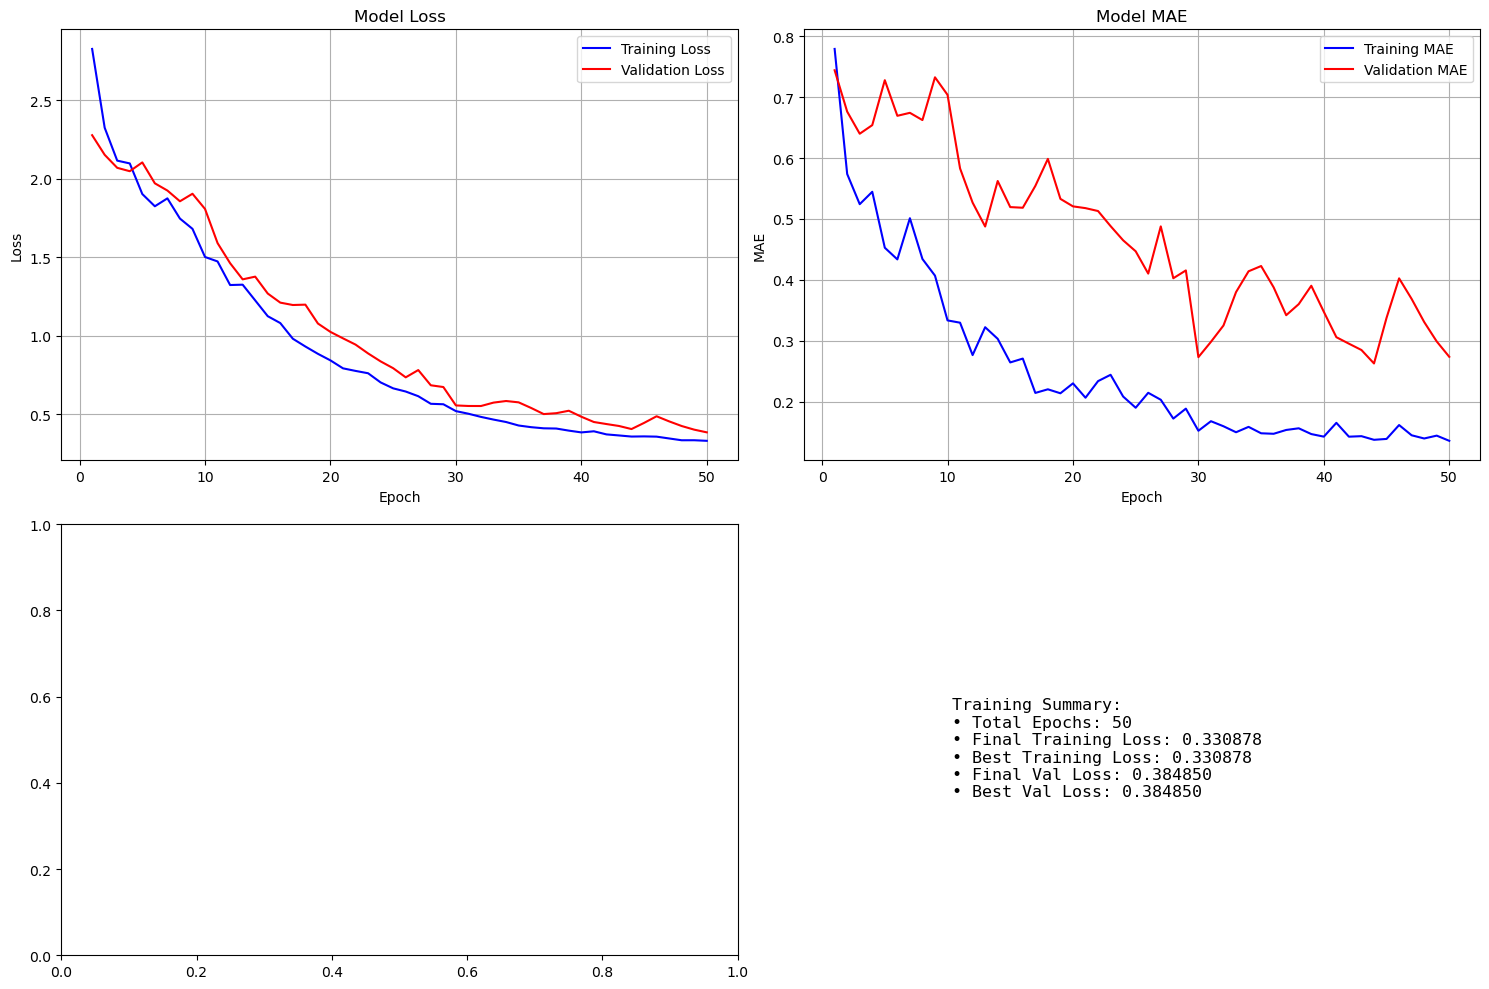

2025-08-16 07:07:28,503 - stock_predictor.models - INFO - Training history plotted



üéâ Model ready for evaluation & live predictions


In [23]:
# %%
print("üöÄ Cell 4 ‚Äì Training LSTM on real RELIANCE.NS data")
print("="*70)

# --- 1. Safety check --------------------------------------------------------
needed = ['X_train', 'X_test', 'y_train', 'y_test', 'scaler']
missing = [v for v in needed if v not in globals()]
if missing:
    print("‚ùå Still missing:", missing, "\nRun Cell 3 first.")
    raise SystemExit()

# --- 2. Short data summary --------------------------------------------------
print(f"‚úÖ Variables present ‚Äì training on {X_train.shape[0]} sequences")
print(f"   Timesteps / features per sequence : {X_train.shape[1:]}")

# --- 3. Build & train the model --------------------------------------------
predictor = StockPredictor(
    model_dir="../models",
    learning_rate=1e-3,
    epochs=50,
    batch_size=16,
    lstm_units=64,
    dropout_rate=0.2,
    l2_reg=0.01
)

history = predictor.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    architecture='standard',
    patience=10,
    verbose=1
)

# --- 4. Report --------------------------------------------------------------
print("\n‚úÖ Training complete")
print(f"   Final train loss : {history['loss'][-1]:.6f}")
print(f"   Final val  loss  : {history['val_loss'][-1]:.6f}")
predictor.plot_training_history()

print("\nüéâ Model ready for evaluation & live predictions")
print("="*70)


In [25]:
# Batch inference: one prediction per input sequence
def batch_predict(model, X):
    """
    Return deterministic prediction for every sample in X.
    Works with the existing StockPredictor model.
    """
    preds = model.predict(X, verbose=0).flatten()
    return preds



üìä Evaluation on 39-day hold-out set
MSE                 : 12,586.5708
RMSE                : 112.1899
MAE                 : 103.4726
MAPE                : 7.0732
DIRECTIONAL_ACCURACY: 47.3684
HIT_RATE_5PCT       : 28.2051


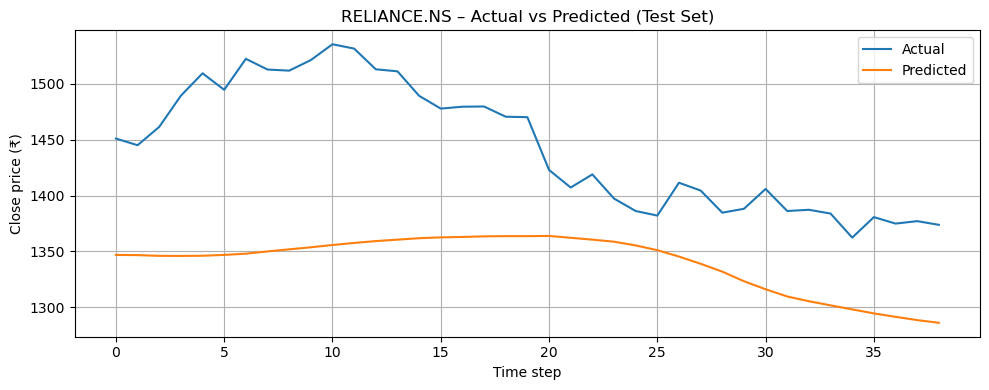

In [ ]:
# 1. Predict every sequence in the test set
y_pred_scaled = batch_predict(predictor.model, X_test)

# 2. Inverse-transform
y_test_inv, y_pred_inv = predictor._inverse_transform_predictions(
    y_test, y_pred_scaled, scaler
)

# 3. Metrics
metrics = predictor._calculate_metrics(y_test_inv, y_pred_inv)

print("\nüìä Evaluation on 39-day hold-out set")
for k, v in metrics.items():
    print(f"{k.upper():20}: {v:,.4f}")

# 4. Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(y_test_inv,  label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.title(f"{primary_symbol} ‚Äì Actual vs Predicted (Test Set)")
plt.xlabel("Time step")
plt.ylabel("Close price (‚Çπ)")
plt.legend(); plt.grid(); plt.tight_layout(); plt.show()

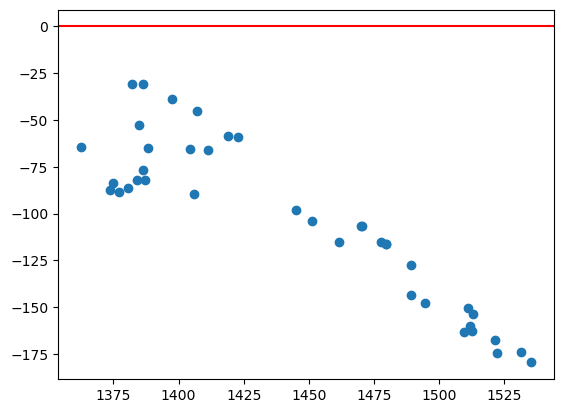

In [27]:
error = y_pred_inv - y_test_inv
plt.scatter(y_test_inv, error); plt.axhline(0,c='r')
